In [44]:
library(caret)
library(dplyr)
options(warn = -1)
library(caret)
library(nnet)
library(e1071)
library(randomForest)
library(party)
library(NbClust)

In [45]:
서울대전앞뒤2일 <- read.csv('../AIData/alldata.csv')[,-c(5,6:9)]
# 서울대전앞뒤2일 <- read.csv('../AIData/2019수정버전.csv')
서울대전앞뒤2일$날짜 <- as.Date(서울대전앞뒤2일$날짜)
head(서울대전앞뒤2일)
# str(서울대전앞뒤2일)

날짜,일차,출발시간,소요시간
2013-02-08,0,0,91
2013-02-09,1,0,132
2013-02-10,2,0,83
2013-02-11,3,0,87
2013-02-12,4,0,84
2013-02-08,0,1,88


In [46]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(서울대전앞뒤2일$출발시간, p=0.7, list=F)
  data.tr <- 서울대전앞뒤2일[samp,]
  data.test <- 서울대전앞뒤2일[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 81.78472

82.6527777777778
81.75
81.8784722222222
82.4965277777778


81.7351916376307
82.034843205575
82.2473867595819

81.8680555555555
82.1631944444445

# 선생님이 알려주신 정확도 계산법

In [47]:
# 머신러닝의 회귀식에서 정확도와 표준오차를 구하는 방법

# 다음과 같이 실제값과 예측한 값이 있다고 가정하자.

correct <- c(1, 2, 3, 4, 5)
predicted <- c(0.9, 1.8, 2.5, 4.2, 5.1)



### 정확도 (결정계수)

R <sup>2</sup> = 1 - {(정답 - 예측값)<sup>2</sup>}의 합 / {(정답 - 정답의 평균)<sup>2</sup>}의 합

In [48]:
# 정확도


r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.965

# 평균 절대 오차 (Mean Absolute Error)

In [49]:
# 평균 절대 오차 

library(Metrics) # Anaconda Navigator에서 r-metrics를 설치
mae(correct, predicted)

ERROR: Error in library(Metrics): there is no package called ‘Metrics’


---

In [ ]:
base <- read.csv('AIData/그래프용.csv', header = TRUE)
base <- arrange(base , 년도 )
base <- base[,-(5:6)]
head(base)

소요시간,출발시간,일차,연휴길이
91,0,0,3
88,1,0,3
88,2,0,3
87,3,0,3
91,4,0,3
97,5,0,3


In [ ]:
  samp <- createDataPartition(base$출발시간, p=0.7, list=F)
  data.tr <- base[samp,]
  data.test <- base[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
#   예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
#   sum <- sum + 예측력_rf

In [ ]:
r = 1 - (sum((y - pred_rf)^2) / sum((y - mean(y))^2))
r

[1] 0.5461466

In [123]:
base <- read.csv('AIData/그래프용.csv', header = TRUE)
base <- arrange(base , 년도 )
base <- base[,-(5:6)]

data.kmeans <- kmeans(sqrt(첫날[,1]), centers = 3, iter.max = 10000) # 2,3,9,24,29
data.kmeans$centers

첫날$cluster <- as.factor(data.kmeans$cluster)

In [ ]:
# table(rmdata$cluster)

# table(base$cluster)
# max(base[,1])
# min(base[,1])
# 첫째날 2 , 비율 망
# 둘째날 추천 3 , 비율 거의 동일 4:5:5
table(첫날$cluster)


  1   2   3 
100  39  25 

In [122]:
par(bg='white' ,family="AppleGothic")
# plot(base$출발시간, base$소요시간 ,col = base$cluster)

# plot(rmdata$출발시간, log(rmdata$소요시간) ,col = rmdata$cluster)

plot(첫날$출발시간, sqrt(첫날$소요시간) ,col = 첫날$cluster)

ERROR: Error in eval(predvars, data, env): 객체 '첫날'를 찾을 수 없습니다


In [ ]:
library(NbClust)


In [ ]:
head(base[,-c(1,5)])
# head(rmdata[,-5])

출발시간,일차,연휴길이
0,0,3
1,0,3
2,0,3
3,0,3
4,0,3
5,0,3


소요시간,출발시간,일차,연휴길이
91,0,0,3
88,1,0,3
88,2,0,3
87,3,0,3
91,4,0,3
97,5,0,3


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


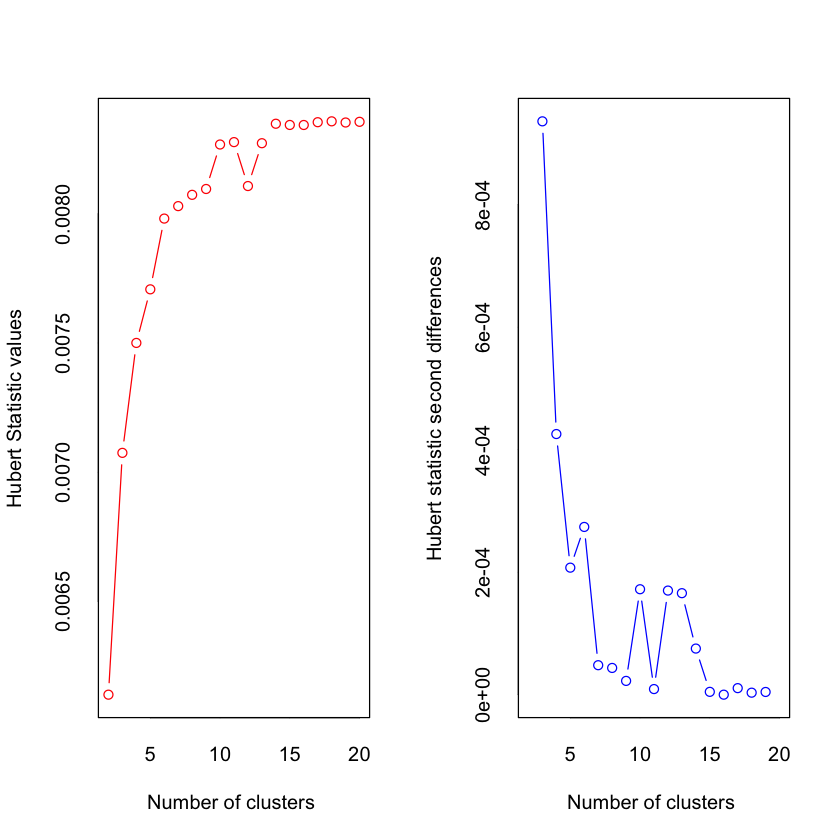

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


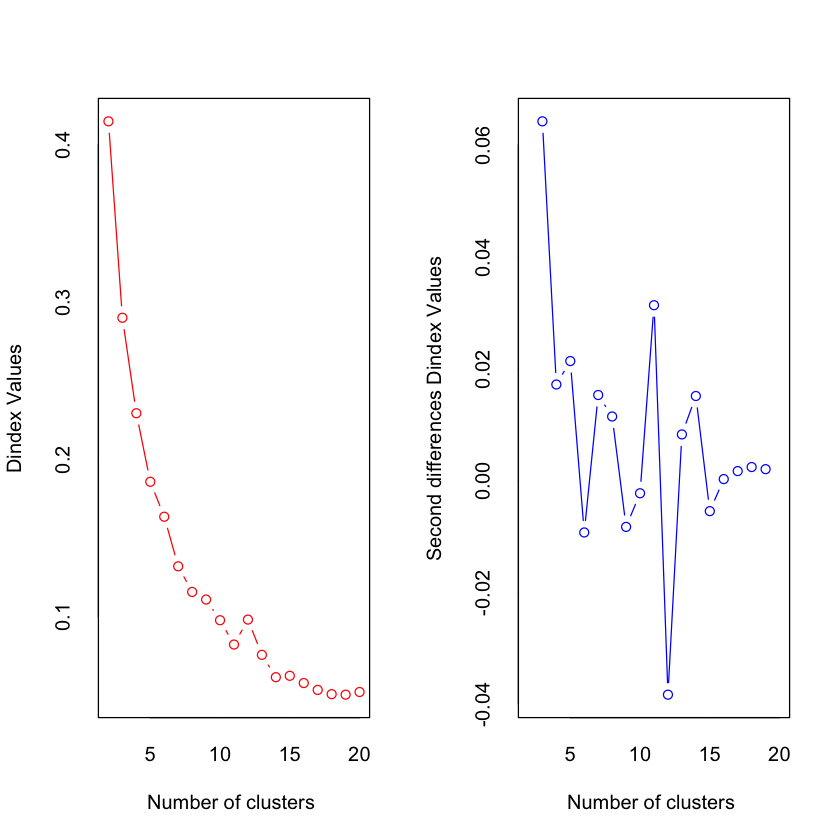

In [ ]:
nc <- NbClust(sqrt(첫날[,1]), min.nc = 2, max.nc = 20, method = "kmeans")

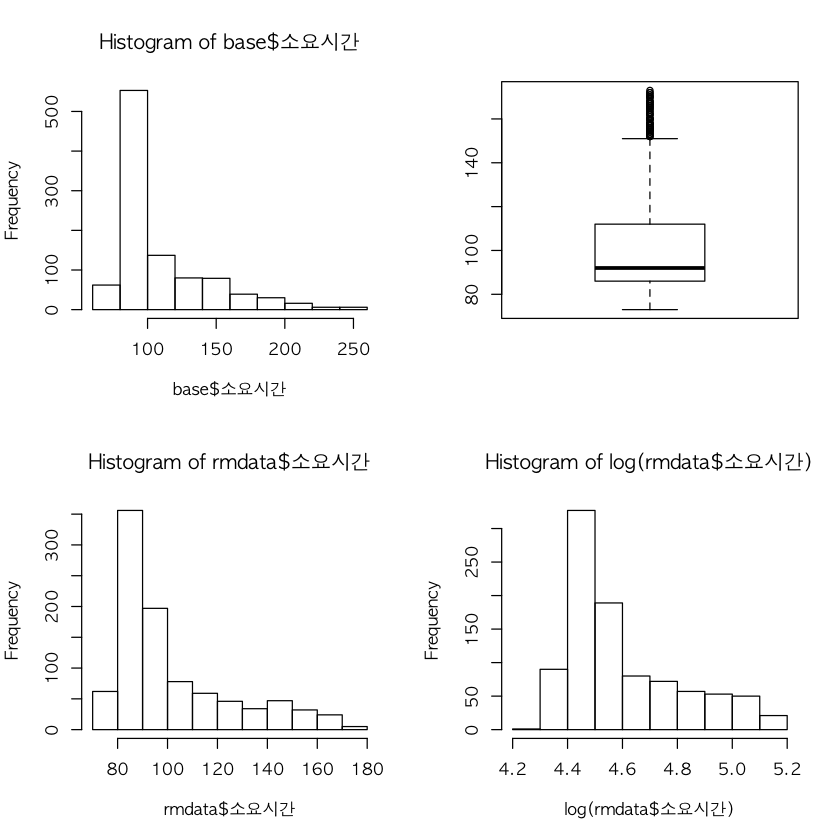

In [ ]:
par(bg='white' ,family="AppleGothic" , mfrow=c(2,2))

# boxplot(base$소요시간)

hist(base$소요시간)

boxplot(rmdata$소요시간)

hist(rmdata$소요시간)
hist(log(rmdata$소요시간))

In [ ]:
quantile(base$소요시간)
summary(base$소요시간)

0%  25%  50%  75% 100% 
  73   86   93  121  251

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   73.0    86.0    93.0   108.6   121.0   251.0 

In [ ]:
base <- read.csv('AIData/그래프용.csv', header = TRUE)#[,-(5:6)]
# Outlier인 데이터 제거하기

# 1분위수 86
# 3분위수 121

LC = 86 - 1.5 * (121 - 86) # 아래 울타리
UC = 121 + 1.5 * (121 - 86) # 위 울타리

rmdata = subset(base, 소요시간 >  LC & 소요시간 < UC)
head(rmdata)
str(rmdata)
write.csv(rmdata, file = "AIData/이상치제거.csv", row.names= FALSE)

소요시간,출발시간,일차,연휴길이,날짜,년도
91,0,0,3,2013-02-08,2013
88,1,0,3,2013-02-08,2013
88,2,0,3,2013-02-08,2013
87,3,0,3,2013-02-08,2013
91,4,0,3,2013-02-08,2013
97,5,0,3,2013-02-08,2013


'data.frame':	940 obs. of  6 variables:
 $ 소요시간: int  91 88 88 87 91 97 96 89 90 91 ...
 $ 출발시간: int  0 1 2 3 4 5 6 7 8 9 ...
 $ 일차    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 연휴길이: int  3 3 3 3 3 3 3 3 3 3 ...
 $ 날짜    : Factor w/ 42 levels "2013-02-08","2013-02-09",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 년도    : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...


In [ ]:
첫날 <- subset(rmdata , 일차 == 0 )
둘날 <- subset(rmdata , 일차 == 1 )
셋날 <- subset(rmdata , 일차 == 2 )
넷날 <- subset(rmdata , 일차 == 3 )

In [ ]:
subset(arrange(첫날, cluster , 소요시간) , cluster==3)

,소요시간,출발시간,일차,연휴길이,cluster
101,129,15,0,5,3
102,129,16,0,4,3
103,131,16,0,4,3
104,133,18,0,5,3
105,134,20,0,5,3
106,136,16,0,3,3
107,138,19,0,5,3
108,139,15,0,4,3
109,139,15,0,5,3
110,139,15,0,4,3


In [ ]:
d2 <- read.csv("AIData/D-2.csv")[,-c(4,9)]
str(d2)
table(d2$소요시간범위)
d2_basic <- d2[,c(1:3)]
d2_basic <- arrange(d2_basic , 소요시간범위 , 연휴길이 )
head(d2_basic)

'data.frame':	144 obs. of  7 variables:
 $ 소요시간범위: Factor w/ 4 levels "A","B","C","D": 2 2 2 1 2 2 2 2 2 2 ...
 $ 출발시간    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ 연휴길이    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ 눈비        : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ X1종.교통량 : int  3793419 2514790 1846564 1632415 2247045 5186824 10866409 15984740 17462577 19314963 ...
 $ X2종.교통량 : int  229419 203047 235137 305994 444384 774325 1206051 1349972 1624836 1932103 ...
 $ 서울인구수  : int  10388055 10388055 10388055 10388055 10388055 10388055 10388055 10388055 10388055 10388055 ...



 A  B  C  D 
35 37 36 36 

소요시간범위,출발시간,연휴길이
A,3,3
A,0,4
A,1,4
A,2,4
A,3,4
A,4,4


In [ ]:
samp <- createDataPartition(d2_basic$소요시간범위, p=0.7, list=F)
data.tr <- d2_basic[samp,]
data.test <- d2_basic[-samp,]

x <- subset(data.test, select = -소요시간범위)
y <- data.test$소요시간범위

model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
pred_rf <- predict(model_rf, x)
mean(pred_rf == y) 


[1] 0.7317073

In [ ]:

# 인공신경망
model.nnet <- nnet(소요시간범위 ~ . , data=data.tr, size = 3)
# 검증
pred <- predict(model.nnet, x, type='class')
# 예측력과 오분류포
mean(pred == y)
table(pred , y)

# 의사결정나무
model.ctree <- ctree(소요시간범위 ~ . , data=data.tr )
# 검증
pred <- predict(model.ctree, x)
# 예측력과 오분류포
mean(pred == y)
table(pred , y)

# SVM
model.svm = svm(소요시간범위 ~ . , data=data.tr )
# 검증
pred <- predict(model.svm, x)
# 예측력과 오분류포
mean(pred == y)
table(pred , y)

# 로지스틱
model.mt <- multinom(소요시간범위 ~ . , data=data.tr )
# 검증하기
pred <- predict(model.mt , x)
# 예측력과 오분류포
mean(pred == y)
# table(pred , y) + as.table(matrix(nrow=2,ncol=2))

# weights:  25
initial  value 151.389651 
iter  10 value 100.925065
iter  20 value 74.663648
iter  30 value 69.504105
iter  40 value 69.353735
iter  50 value 69.349081
final  value 69.348932 
converged


[1] 0.5121951

    y
pred  A  B  C  D
   A 10  9  0  0
   B  0  1  0  0
   D  0  1 10 10

[1] 0.7073171

    y
pred  A  B  C  D
   A  0  0  0  0
   B 10 10  0  0
   C  0  1  9  0
   D  0  0  1 10

[1] 0.7317073

    y
pred  A  B  C  D
   A  7  6  0  0
   B  3  3  0  0
   C  0  2 10  0
   D  0  0  0 10

# weights:  16 (9 variable)
initial  value 142.788319 
iter  10 value 64.315672
iter  20 value 44.289651
iter  30 value 42.103917
iter  40 value 41.361217
iter  50 value 40.999232
iter  60 value 40.839043
iter  70 value 40.712654
iter  80 value 40.532512
iter  90 value 40.408687
iter 100 value 40.376727
final  value 40.376727 
stopped after 100 iterations


[1] 0.7560976

In [ ]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_nnet_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0

for (i in 1:100){
  samp <- createDataPartition(d2_basic$소요시간범위, p=0.7, list=F)
  data.tr <- d2_basic[samp,]
  data.test <- d2_basic[-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)

  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3)
  pred_nnet <- predict(model_nnet, x_test, type="class" )
  예측력_nnet <- mean(pred_nnet == y_test) 
  # 인공신경망 tr
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3)
  pred_nnet <- predict(model_nnet, x_tr, type="class")
  예측력_nnet <- mean(pred_nnet == y_tr) 
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_ctree <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
  model_multinom <- multinom(소요시간범위 ~ . , data=data.tr ,trace = FALSE)
  # model_multinom <- multinom(소요시간 ~ ., data=data.tr)
  # pred_multinom <- predict(model_multinom, x, type="class")
  # 예측력_multinom <- mean((pred_multinom*0.85 < y) & (pred_multinom*1.15 > y)) 
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_ctree
  sum_svm <- sum_svm + 예측력_svm
  # sum_multi <- sum_multi + 예측력_multinom
  # sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", round(sum_rf,2), "\n")
cat("의사결정나무 : ", round(sum_ctree,2), "\n")
cat("SVM :  ", round(sum_svm,2), "\n")
# sum_multi
# sum_ctree
cat("———————————————", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", round(sum_rf_tr,2), "\n")
cat("의사결정나무 : ", round(sum_ctree_tr,2), "\n")
cat("SVM :  ", round(sum_svm_tr,2), "\n")

# weights:  25
initial  value 154.614717 
iter  10 value 85.008746
iter  20 value 53.686467
iter  30 value 40.329561
iter  40 value 37.200816
iter  50 value 36.613585
iter  60 value 36.088608
iter  70 value 35.416751
iter  80 value 35.406936
iter  90 value 35.405558
iter 100 value 35.396827
final  value 35.396827 
stopped after 100 iterations
# weights:  25
initial  value 160.409327 
iter  10 value 87.713096
iter  20 value 56.545307
iter  30 value 41.852470
iter  40 value 40.903452
iter  50 value 40.197806
iter  60 value 40.194136
iter  70 value 40.178211
iter  80 value 40.163860
iter  90 value 40.141696
iter 100 value 40.074732
final  value 40.074732 
stopped after 100 iterations
# weights:  25
initial  value 176.061539 
iter  10 value 84.186841
iter  20 value 43.520033
iter  30 value 42.505574
iter  40 value 41.711886
iter  50 value 40.966051
iter  60 value 40.211139
iter  70 value 39.274781
iter  80 value 38.841061
iter  90 value 38.567330
iter 100 value 38.516374
final  value 38.51

In [116]:
sdd2 <- read.csv("AIData/D-2.csv")[,c(1:3,5:7)]
head(sdd2)
day1 <- read.csv("AIData/D-1.csv")[,-4]
dday <- read.csv("AIData/DDAY.csv")[,-4]

소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량
B,0,3,TRUE,3793419,229419
B,1,3,TRUE,2514790,203047
B,2,3,TRUE,1846564,235137
A,3,3,TRUE,1632415,305994
B,4,3,TRUE,2247045,444384
B,5,3,TRUE,5186824,774325


In [153]:
day1am <- read.csv("AIData/day1이상치제거_오전_재분류.csv", header=TRUE)
head(day1am)
day1am <- day1am[,1:7]

소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
A,0,3,TRUE,3793419,229419,10388055,132
A,1,3,TRUE,2514790,203047,10388055,129
A,2,3,TRUE,1846564,235137,10388055,121
A,3,3,TRUE,1632415,305994,10388055,124
A,4,3,TRUE,2247045,444384,10388055,119
A,5,3,TRUE,5186824,774325,10388055,118


In [157]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

# set.seed(15) # 1500 데이2기본돌렸을때 수치 엄청 좋았음 ,15일때 구림
samp <- createDataPartition(day1am$소요시간범위, p=0.7, list=F)
data.tr <- day1am[samp,]
data.test <- day1am[-samp,]

for (i in 1:100){
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 500)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 500)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)

  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3,trace="FALSE")
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3,trace="FALSE")
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr,trace="FALSE")
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr,trace="FALSE")
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}

# cat("setsedd 15 \n")
cat("D-2 기본 100회 평균 \n")
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf/100, "\n")
cat("의사결정나무 : ", sum_ctree/100, "\n")
cat("SVM :  ", sum_svm/100, "\n")
cat("다항 로지스틱 :  ", sum_multi/100, "\n")
cat("인공신경망 :  ", sum_nnet/100, "\n")
# sum_ctree
cat("————————————", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr/100, "\n")
cat("의사결정나무 : ", sum_ctree_tr/100, "\n")
cat("SVM :  ", sum_svm_tr/100, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr/100, "\n")
cat("인공신경망 :  ", sum_nnet_tr/100, "\n")

D-2 기본 100회 평균 
Test Data 
랜덤 포레스트 :  0.7983333 
의사결정나무 :  0.5555556 
SVM :   0.7222222 
다항 로지스틱 :   0.7222222 
인공신경망 :   0.5555556 
———————————— 
Training Data 
랜덤 포레스트 :  1 
의사결정나무 :  0.6666667 
SVM :   0.7647059 
다항 로지스틱 :   0.8431373 
인공신경망 :   0.4862745 


In [110]:
set.seed(1500) 
samp <- createDataPartition(sdd2$소요시간범위, p=0.7, list=F)
data.tr15 <- sdd2[samp,]
data.te15 <- sdd2[-samp,]


In [112]:
# rownames(data.tr1500) 
# rownames(data.tr15)

# head(data.tr1500,20)
# head(data.tr15,20)

table(data.tr1500$소요시간범위)
table(data.te1500$소요시간범위)

table(data.tr15$소요시간범위)
table(data.te15$소요시간범위)

# rownames(data.te1500) 
# rownames(data.te15)



 A  B  C  D 
25 26 26 26 


 A  B  C  D 
10 11 10 10 


 A  B  C  D 
25 26 26 26 


 A  B  C  D 
10 11 10 10 